# Data Science Salary Prediction

## 1. About the DATASET

**Dataset**: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor/data

**This dataset was made by scrapping the job postings related to the position of 'Data Scientist' from www.glassdoor.com in USA.The Auther, NIKHIL BHATI, got the following columns: Job title, Salary Estimate, Job Description, Rating, Company, Location, Company , Headquarters, , , any Size, Company Founded Date, Type of Ownership, Industry, Sector, Revenue, Competitors.** 


**Objectives :Implement a deep learning algorithm to construct a salary prediction model for jobs related to data science.**

## 2. Importing Essential Libraries

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')
# reduce display precision on numpy arrays
np.set_printoptions(precision=2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import json

## 3. Exploratory Data Analysis (EDA)

In [247]:
df = pd.read_csv('data_science_salary_2021.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [248]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [249]:
df.shape

(742, 42)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

**While there are no null values in this dataset, it's important to note that the author used '-1' and 'NaN' to represent information that was either unavailable or couldn't be scraped by Selenium.**

In [251]:
df.columns
df.describe(include='all')

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
count,742.000000,742,742,742,742.000000,742,742,742,742,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742,742,742
unique,NaN,264,416,463,NaN,343,200,198,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,3
top,NaN,Data Scientist,$49K-$113K (Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,NaN,MassMutual\n3.6,"New York, NY","New York, NY",1001 - 5000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data scientist,na,na
freq,NaN,131,6,4,NaN,14,55,52,150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,519,383
mean,469.129380,NaN,NaN,NaN,3.618868,NaN,NaN,NaN,NaN,1837.154987,...,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,NaN,NaN,NaN
std,279.793117,NaN,NaN,NaN,0.801210,NaN,NaN,NaN,NaN,497.183763,...,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,221.500000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1939.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,472.500000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,1988.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,707.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [252]:
# drop some unused columns (mostly empty columns)
df.drop(columns = ['index', 'Salary Estimate', 'Job Description', 'Employer provided', 'Company Name', 'Competitors', 
                       'Hourly','Location','Headquarters','Size','company_txt'], inplace = True)

In [253]:
df.head()

,Job Title,Rating,Founded,Type of ownership,Industry,Sector,Revenue,Lower Salary,Upper Salary,Avg Salary(K),...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,3.8,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,3.4,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,4.8,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80,90,85.0,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,3.8,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56,97,76.5,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,2.9,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86,143,114.5,...,0,0,0,0,0,0,0,data scientist,na,na


In [254]:
# Extract Revenue
def extract_revenue(revenue):
    # Use regular expression to find numbers in the string
    numbers = re.findall(r'\d+\.?\d*', revenue)
    
    # Assuming the format is consistent, extract the numbers for min and max range
    if len(numbers) >= 2:
        min_revenue = float(numbers[0])
        max_revenue = float(numbers[1])
        
        # Assuming 'million' is the unit in all cases, convert to thousands of USD
        min_revenue *= 1_000
        max_revenue *= 1_000
        
        # Calculate mean revenue in thousands of USD
        mean_revenue = (min_revenue + max_revenue) / 2
        
        return mean_revenue
    else:
        return None  # Return None for cases where pattern doesn't match

# Apply the function to convert revenue strings into thousands of USD
df['Numerical Revenue (in thousands of USD)'] = df['Revenue'].apply(extract_revenue)

df = df.drop('Revenue',axis=1)
df.head()

,Job Title,Rating,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job Location,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Numerical Revenue (in thousands of USD)
0,Data Scientist,3.8,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,53,91,72.0,NM,...,0,1,1,0,0,0,data scientist,na,M,75000.0
1,Healthcare Data Scientist,3.4,1984,Other Organization,Health Care Services & Hospitals,Health Care,63,112,87.5,MD,...,0,0,0,0,0,0,data scientist,na,M,3500.0
2,Data Scientist,4.8,2010,Company - Private,Security Services,Business Services,80,90,85.0,FL,...,0,0,0,0,0,0,data scientist,na,M,300000.0
3,Data Scientist,3.8,1965,Government,Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,...,0,0,0,0,0,0,data scientist,na,na,250500.0
4,Data Scientist,2.9,1998,Company - Private,Advertising & Marketing,Business Services,86,143,114.5,NY,...,0,0,0,0,0,0,data scientist,na,na,NaN


In [255]:
#Extract Size
# Function to convert size ranges to single values
# def convert_size_to_value(size):
#     if '+' in size:
#         return int(size.replace('+', '')) + 500  # Replace '1000+' with a larger value (e.g., 1500)
#     elif '-' in size:
#         split_values = size.split(' - ')
#         try:
#             return (int(split_values[0]) + int(split_values[1])) / 2  # Calculate mean for ranges
#         except ValueError:
#             return None  # Handle unexpected non-numeric values
#     else:
#         return None  # Handle other unexpected values

# Apply the function to create a new column with transformed size values
# df['Size (Transformed)'] = df['Size'].apply(convert_size_to_value)
# df = df.drop('Size',axis=1)
df.head()


,Job Title,Rating,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job Location,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Numerical Revenue (in thousands of USD)
0,Data Scientist,3.8,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,53,91,72.0,NM,...,0,1,1,0,0,0,data scientist,na,M,75000.0
1,Healthcare Data Scientist,3.4,1984,Other Organization,Health Care Services & Hospitals,Health Care,63,112,87.5,MD,...,0,0,0,0,0,0,data scientist,na,M,3500.0
2,Data Scientist,4.8,2010,Company - Private,Security Services,Business Services,80,90,85.0,FL,...,0,0,0,0,0,0,data scientist,na,M,300000.0
3,Data Scientist,3.8,1965,Government,Energy,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,...,0,0,0,0,0,0,data scientist,na,na,250500.0
4,Data Scientist,2.9,1998,Company - Private,Advertising & Marketing,Business Services,86,143,114.5,NY,...,0,0,0,0,0,0,data scientist,na,na,NaN


In [256]:
df[['Industry','Sector','Type of ownership','job_title_sim']].head(5)

,Industry,Sector,Type of ownership,job_title_sim
0,Aerospace & Defense,Aerospace & Defense,Company - Private,data scientist
1,Health Care Services & Hospitals,Health Care,Other Organization,data scientist
2,Security Services,Business Services,Company - Private,data scientist
3,Energy,"Oil, Gas, Energy & Utilities",Government,data scientist
4,Advertising & Marketing,Business Services,Company - Private,data scientist


**Change some categorical columns' values with initials**

In [257]:
df['Job Title'] = df['Job Title'].apply(lambda x: ''.join(word[0] for word in x.split()))
df['Type of ownership'] = df['Type of ownership'].apply(lambda x: ''.join(word[0] for word in x.split()))
df['job_title_sim'] = df['job_title_sim'].apply(lambda x: ''.join(word[0] for word in x.split()))
df['Industry'] = df['Industry'].apply(lambda x: ''.join(word[0] for word in x.split()))
df['Sector'] = df['Sector'].apply(lambda x: ''.join(word[0] for word in x.split()))
# df['company_txt'] = df['company_txt'].apply(lambda x: ''.join(word[0] for word in x.split()))

df[['Industry','Sector','Type of ownership','job_title_sim']].head(5)


,Industry,Sector,Type of ownership,job_title_sim
0,A&D,A&D,C-P,ds
1,HCS&H,HC,OO,ds
2,SS,BS,C-P,ds
3,E,OGE&U,G,ds
4,A&M,BS,C-P,ds


**Change values of location columns with state initials**

In [258]:
#Exteact State of some columns contaning location
def extract_state(location):
    return location.split(', ')[-1]  # Split by comma and space, extract the state part

# Apply the function to create new columns for state names

df['Job Location'] = df['Job Location'].apply(extract_state)

df.head()

,Job Title,Rating,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job Location,...,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Numerical Revenue (in thousands of USD)
0,DS,3.8,1973,C-P,A&D,A&D,53,91,72.0,NM,...,0,1,1,0,0,0,ds,na,M,75000.0
1,HDS,3.4,1984,OO,HCS&H,HC,63,112,87.5,MD,...,0,0,0,0,0,0,ds,na,M,3500.0
2,DS,4.8,2010,C-P,SS,BS,80,90,85.0,FL,...,0,0,0,0,0,0,ds,na,M,300000.0
3,DS,3.8,1965,G,E,OGE&U,56,97,76.5,WA,...,0,0,0,0,0,0,ds,na,na,250500.0
4,DS,2.9,1998,C-P,A&M,BS,86,143,114.5,NY,...,0,0,0,0,0,0,ds,na,na,NaN


**Handling '-1' in Categorical Columns**

In [259]:
# int_cols : categorical columns that store integer values, such as python, hadoop,...
int_cols = df.select_dtypes(include=['int64']).columns

# excluding numerical columns like 'Upper Salary' and 'Lower Salary' from int_cols.
col_to_drop = ['Upper Salary','Lower Salary','Age']
int_cols = int_cols.drop(col_to_drop)

# Replacing '-1' with NaN for integer columns
df[int_cols] = df[int_cols].replace(-1, np.nan)

# Filling missing values with the mode of respective columns
for col in int_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Printing value counts for updated columns
for col in int_cols:
    print(df[col].value_counts())

Founded
2010.0    82
2008.0    31
1996.0    27
2006.0    24
2012.0    21
          ..
1860.0     1
1942.0     1
1878.0     1
1971.0     1
1889.0     1
Name: count, Length: 101, dtype: int64
Python
1    392
0    350
Name: count, dtype: int64
spark
0    575
1    167
Name: count, dtype: int64
aws
0    566
1    176
Name: count, dtype: int64
excel
1    388
0    354
Name: count, dtype: int64
sql
1    380
0    362
Name: count, dtype: int64
sas
0    676
1     66
Name: count, dtype: int64
keras
0    713
1     29
Name: count, dtype: int64
pytorch
0    703
1     39
Name: count, dtype: int64
scikit
0    688
1     54
Name: count, dtype: int64
tensor
0    670
1     72
Name: count, dtype: int64
hadoop
0    618
1    124
Name: count, dtype: int64
tableau
0    594
1    148
Name: count, dtype: int64
bi
0    686
1     56
Name: count, dtype: int64
flink
0    732
1     10
Name: count, dtype: int64
mongo
0    705
1     37
Name: count, dtype: int64
google_an
0    728
1     14
Name: count, dtype: int64


In [260]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].replace('-1', np.nan) # Convert '-1'  to actual Null values

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)


In [261]:
for col in categorical_cols:
    print(df[col].value_counts())

Job Title
DS              131
DE               53
SDS              37
SDE              24
SDA              17
               ... 
DAM               1
SML(E/DS-CSA      1
AS                1
S2QVV             1
MLE(              1
Name: count, Length: 246, dtype: int64
Type of ownership
C-P     603
NO       55
SoBS     34
G        15
H        15
C/U      13
OO        5
S/SD      2
Name: count, dtype: int64
Industry
B&P      112
IC        63
CH&S      59
IS        50
HCS&H     49
ES&NS     42
C         32
I         29
A&D       25
A&M       25
CPM       20
R&D       19
C&U       16
E         14
B&CU      12
FA        11
-         10
S&O       10
F&BM       8
L          8
RE         8
TA         8
FA&R       8
SS         7
DC&SS      6
RO         6
IA&B       6
TM         5
IB&AM      5
A&ES       4
G          4
GS         4
FTP        4
TS         4
KE         4
L&SC       4
IM         4
SA         3
SE         3
ETS        3
VG         3
W          3
CPR        3
MB         2
SGS       

**Handling 'NaN' and '-1' in Numerical Columns**

In [262]:
# Replacing '-1' with NaN for integer columns
df[col_to_drop] = df[col_to_drop].replace(['NaN',-1], np.nan)

# Filling missing values with the mode of respective columns
for col in col_to_drop:
    df[col].fillna(df[col].mean(), inplace=True)


numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].replace(['NaN',-1],np.nan)

# Impute 'NaN' with mean of the respective columns
for col in numerical_cols:
    col_mean = df[col].astype(float).mean()
    df[col].fillna(col_mean, inplace=True)


In [263]:
for col in numerical_cols:
    print(df[col].value_counts())

Rating
3.900000    63
3.800000    61
3.700000    61
3.500000    49
4.000000    47
3.600000    46
3.400000    44
3.300000    39
3.200000    35
4.400000    33
4.300000    32
4.700000    31
4.200000    26
3.100000    25
4.100000    19
2.900000    18
3.000000    17
2.700000    14
2.600000    12
3.688372    11
4.600000    10
4.800000     9
2.400000     7
2.800000     7
4.500000     7
2.100000     5
5.000000     5
1.900000     3
2.300000     2
2.500000     2
2.200000     2
Name: count, dtype: int64
Founded
2010.0    82
2008.0    31
1996.0    27
2006.0    24
2012.0    21
          ..
1860.0     1
1942.0     1
1878.0     1
1971.0     1
1889.0     1
Name: count, Length: 101, dtype: int64
Avg Salary(K)
87.5     12
140.0    11
81.0     11
85.0     10
107.5    10
         ..
157.0     1
174.0     1
179.5     1
232.5     1
111.0     1
Name: count, Length: 219, dtype: int64
Age
51.030347     50
11.000000     32
13.000000     31
25.000000     27
15.000000     24
              ..
161.000000     1
79.0

### Data Visualization

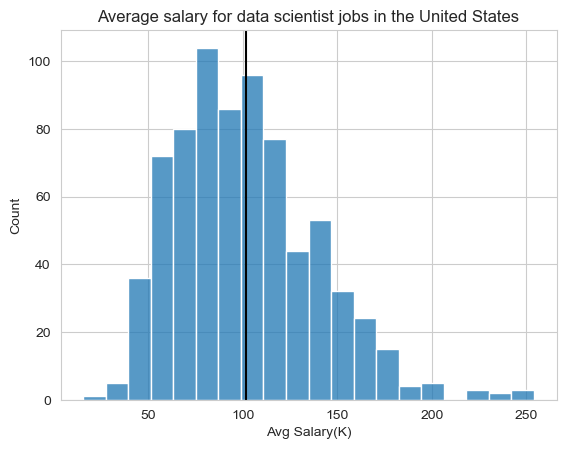

In [264]:
# example of a histplot to visualize quantitative data
sns.set_style("whitegrid")
sns.histplot(data = df, x = 'Avg Salary(K)', bins = 20)
plt.title('Average salary for data scientist jobs in the United States')
# draw vertical line at average 
plt.axvline(x = df['Avg Salary(K)'].mean(), color = 'black')

#### Analysis:

The average salary for data scients in the US is around $100K.


<Axes: title={'center': 'Break down by Job title'}, ylabel='proportion'>

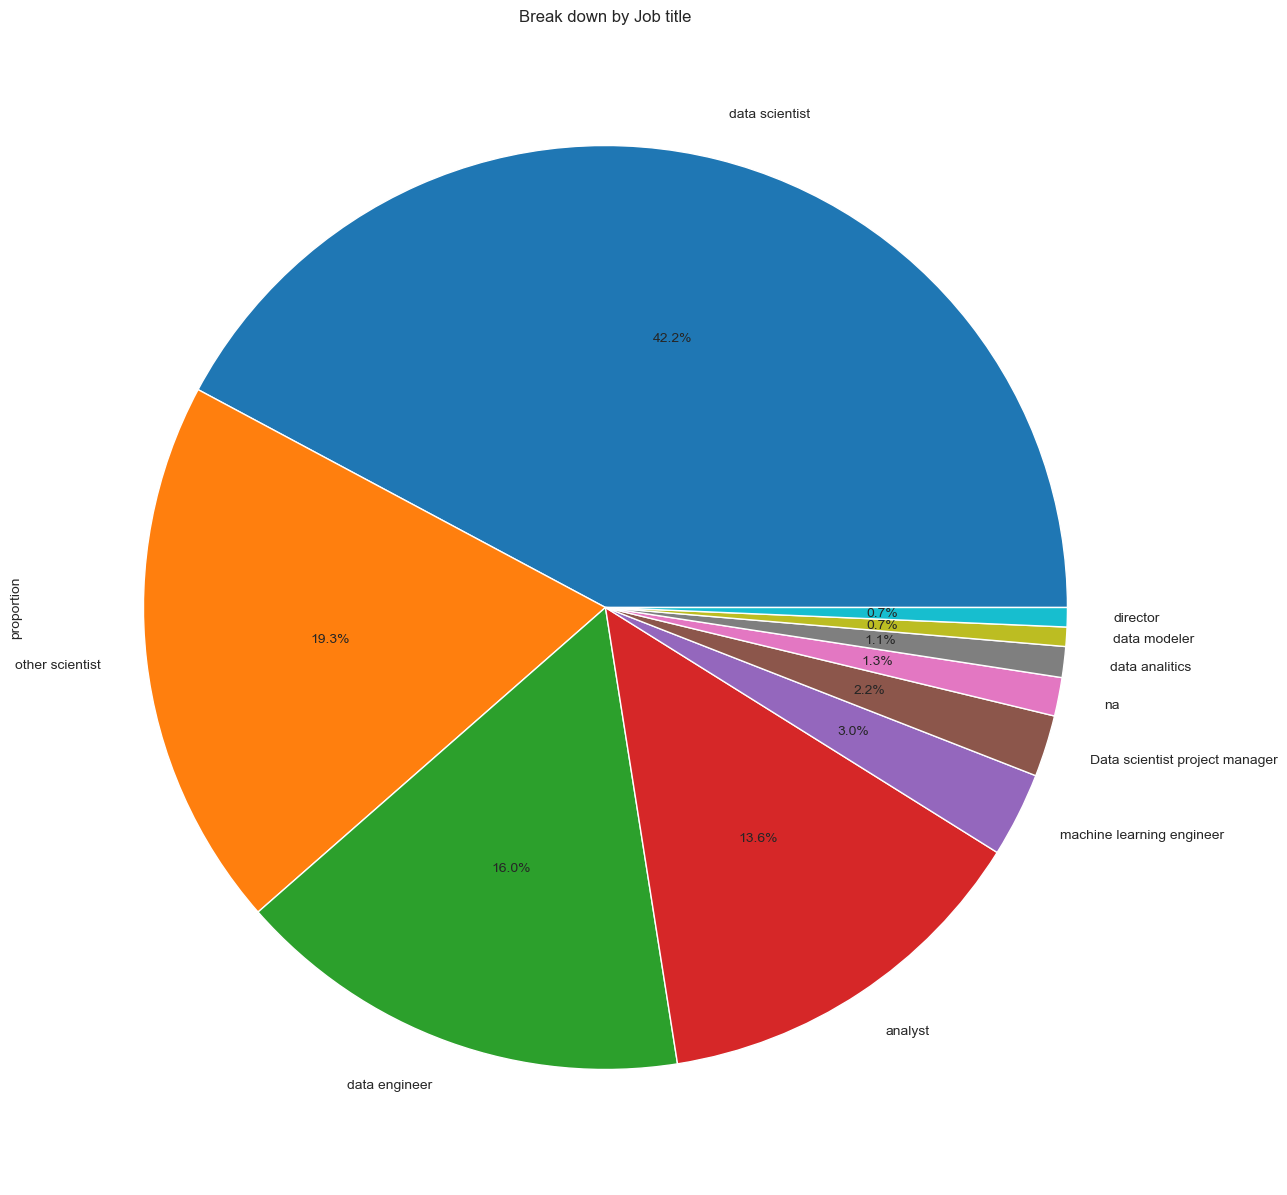

In [265]:
data['job_title_sim'].value_counts(normalize=True).plot.pie(y ='Job title', title = 'Break down by Job title', figsize=(15,15), autopct='%1.1f%%')

#### Analysis:

Data Scientist roles hold the largest share, signifying their prominence in this domain.
Other Scientist roles and Data Engineering positions follow, showcasing a diverse range of scientific and engineering roles within data science.
Analyst roles, Machine Learning Engineer roles, and Data Analyst roles, though essential, have smaller proportions compared to the other roles, indicating a narrower but still significant focus within the field.

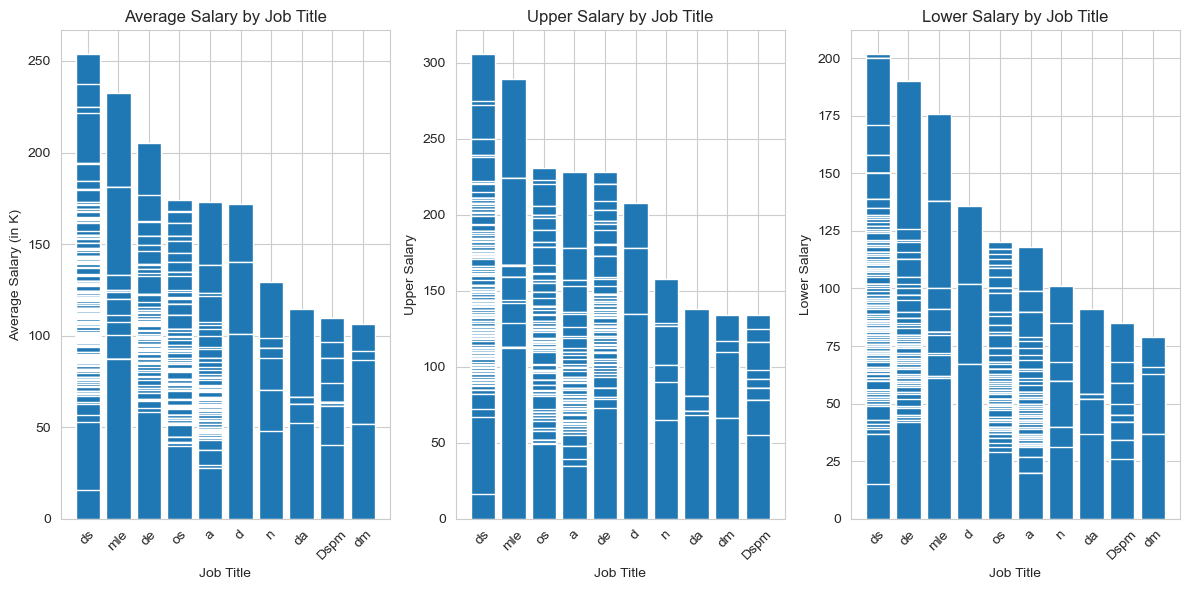

In [266]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot 1 - Average Salary by Job Title
df_sorted_salary = df.sort_values(by='Avg Salary(K)', ascending=False)
axs[0].bar(df_sorted_salary['job_title_sim'], df_sorted_salary['Avg Salary(K)'])
axs[0].set_xlabel('Job Title')
axs[0].set_ylabel('Average Salary (in K)')
axs[0].set_title('Average Salary by Job Title')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2 - Highest Salary by Job Title
df_sorted_rating = df.sort_values(by='Upper Salary', ascending=False)
axs[1].bar(df_sorted_rating['job_title_sim'], df_sorted_rating['Upper Salary'])
axs[1].set_xlabel('Job Title')
axs[1].set_ylabel('Upper Salary')
axs[1].set_title('Upper Salary by Job Title')
axs[1].tick_params(axis='x', rotation=45)

# Plot 3 - Lowest Salary by Job Title
df_sorted_rating = df.sort_values(by='Lower Salary', ascending=False)
axs[2].bar(df_sorted_rating['job_title_sim'], df_sorted_rating['Lower Salary'])
axs[2].set_xlabel('Job Title')
axs[2].set_ylabel('Lower Salary')
axs[2].set_title('Lower Salary by Job Title')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [267]:
data = pd.read_csv('data_science_salary_2021.csv')
data['job_title_sim'].value_counts()

job_title_sim
data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: count, dtype: int64

 **ds: Data Scientist**
  
  **mle: Machine Learning Engineer**
  
  **de : Data Engineer**
  
  **os: Other Scientist**
  
  **a: anlyst**
  
  **d: Director**
  
  **n:NA**
  
  **da: Data Analyst**
  
  **Dspm:Data Scientist Project Manager** 
  
  **dm: Data Modeler**

#### Analysis: 
    
Data Scientists earn the highest salaries, averaging approximately 250K USD and reaching as high as around 300K USD annually. This surpasses all other data science roles, with even the lowest reported salary among them being around 200K USD. Machine learning engineers closely follow in salary trends. The average, higher, and lower salaries for Data Engineers fluctuate around 200K. The average salary for data analysts hovers around 100K USD, while higher salaries approach 150K USD, and lower salaries are around 90K USD. Although not as high as that of data engineers, this suggests that there is more potential for salary growth in this role. Data modeler and data scientist project managers earn the lowest salaries averaging approximately 100K USD and reaching as high as around 130K USD, as low as around 80K USD annually.

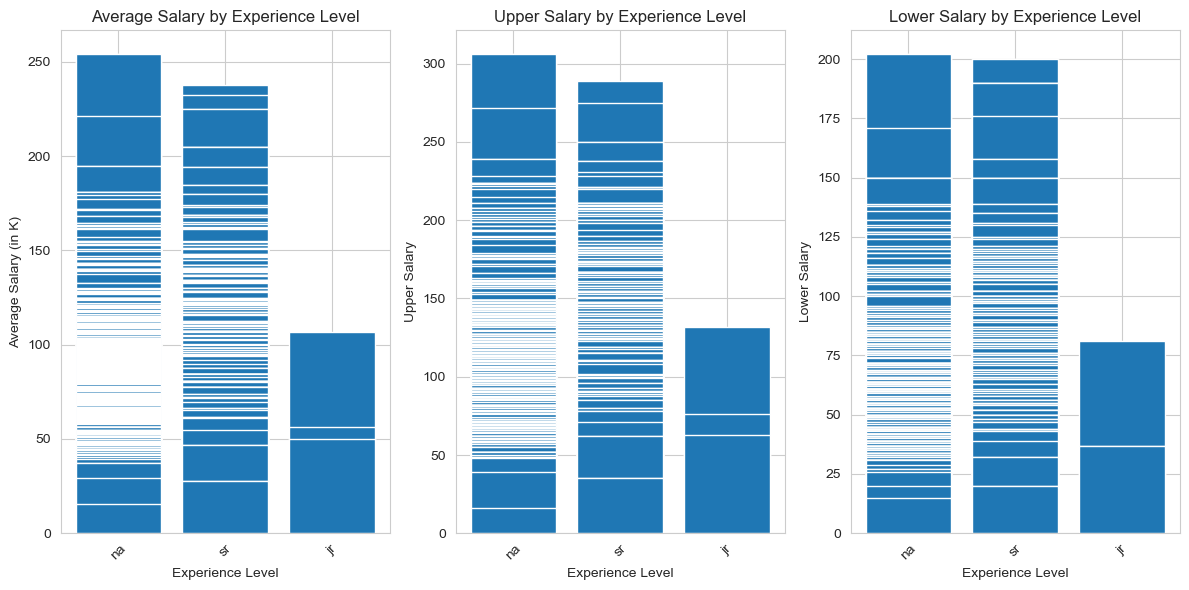

In [268]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot 1 - Average Salary by Job Title
df_sorted_salary = df.sort_values(by='Avg Salary(K)', ascending=False)
axs[0].bar(df_sorted_salary['seniority_by_title'], df_sorted_salary['Avg Salary(K)'])
axs[0].set_xlabel('Experience Level')
axs[0].set_ylabel('Average Salary (in K)')
axs[0].set_title('Average Salary by Experience Level')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2 - Highest Salary by Job Title
df_sorted_rating = df.sort_values(by='Upper Salary', ascending=False)
axs[1].bar(df_sorted_rating['seniority_by_title'], df_sorted_rating['Upper Salary'])
axs[1].set_xlabel('Experience Level')
axs[1].set_ylabel('Upper Salary')
axs[1].set_title('Upper Salary by Experience Level')
axs[1].tick_params(axis='x', rotation=45)

# Plot 3 - Lowest Salary by Job Title
df_sorted_rating = df.sort_values(by='Lower Salary', ascending=False)
axs[2].bar(df_sorted_rating['seniority_by_title'], df_sorted_rating['Lower Salary'])
axs[2].set_xlabel('Experience Level')
axs[2].set_ylabel('Lower Salary')
axs[2].set_title('Lower Salary by Experience Level')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

**na: not available**

**sr: senior**

**jr: junior**

#### Analysis:

People at senior levels earn significantly more than those at junior levels, with average, higher, and lower salaries nearly triple the salary of junior-level positions. With that said, experience makes a significant difference in data science roles. The considerable disparity in earnings between senior and junior levels underscores the impact of experience on salary scales within this field.


In [269]:
df.columns

Index(['Job Title', 'Rating', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job Location', 'Age', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas',
       'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi',
       'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority_by_title',
       'Degree', 'Numerical Revenue (in thousands of USD)'],
      dtype='object')

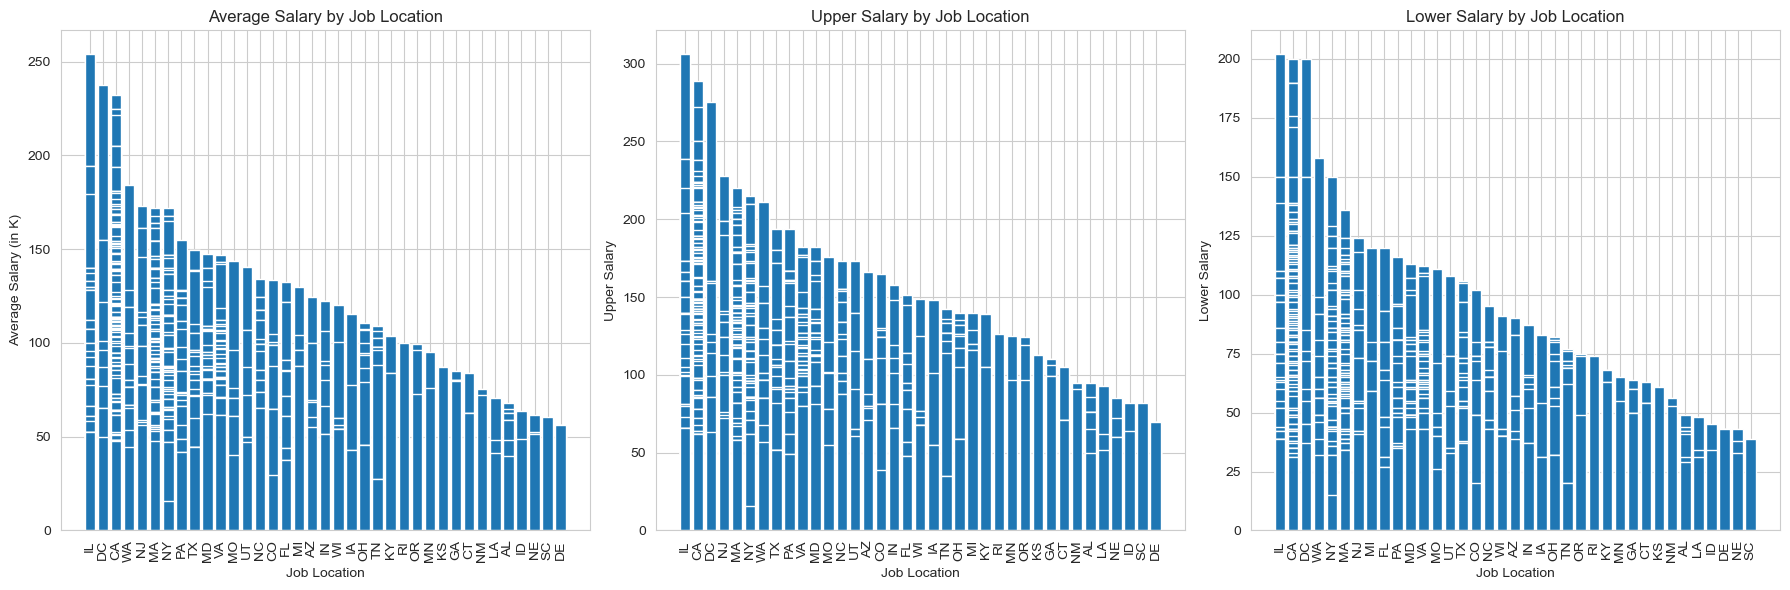

In [270]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1 - Average Salary by Job Title
df_sorted_salary = df.sort_values(by='Avg Salary(K)', ascending=False)
axs[0].bar(df_sorted_salary['Job Location'], df_sorted_salary['Avg Salary(K)'])
axs[0].set_xlabel('Job Location')
axs[0].set_ylabel('Average Salary (in K)')
axs[0].set_title('Average Salary by Job Location')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2 - Highest Salary by Job Title
df_sorted_rating = df.sort_values(by='Upper Salary', ascending=False)
axs[1].bar(df_sorted_rating['Job Location'], df_sorted_rating['Upper Salary'])
axs[1].set_xlabel('Job Location')
axs[1].set_ylabel('Upper Salary')
axs[1].set_title('Upper Salary by Job Location')
axs[1].tick_params(axis='x', rotation=90)

# Plot 3 - Lowest Salary by Job Title
df_sorted_rating = df.sort_values(by='Lower Salary', ascending=False)
axs[2].bar(df_sorted_rating['Job Location'], df_sorted_rating['Lower Salary'])
axs[2].set_xlabel('Job Location')
axs[2].set_ylabel('Lower Salary')
axs[2].set_title('Lower Salary by Job Location')
axs[2].tick_params(axis='x', rotation=90)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

#### Analysis:

Individuals working in Illinois earn the highest salaries, averaging approximately 250K USD and reaching as high as around 300K USD annually. This surpasses salaries reported in all other states within the data science field, even with the lowest reported salary in this range being around 200K USD. Following Illinois, individuals working in the District of Columbia and California have the second and third-highest salaries, respectively.The higher salaries in states like Illinois, the District of Columbia, and California within the data science field can be attributed to factors such as robust industry demand, concentrated job markets, specialized skill requirements, and potentially a higher cost of living. These factors collectively contribute to elevated compensation levels compared to other regions.**

The lower data science salaries in Delaware (DE), South Carolina (SC), Nebraska (NE), Idaho (ID), Louisiana (LA), and Alabama (AL) might reflect factors such as less concentrated job markets, lower demand for specialized skills, different economic sectors dominating these areas, and potentially a lower cost of living.

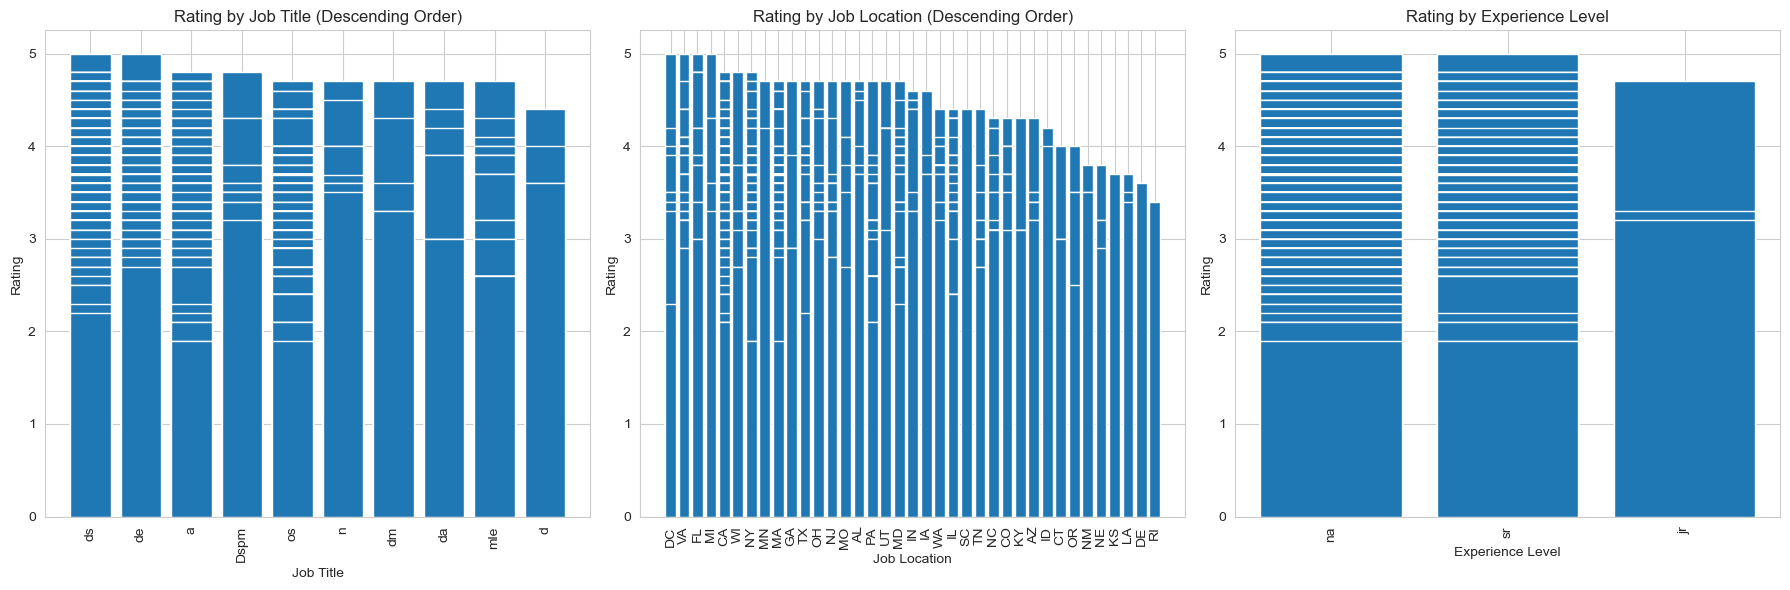

In [271]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


df_sorted = df.sort_values(by='Rating', ascending=False)
axs[0].bar(df_sorted['job_title_sim'],df_sorted['Rating'])
axs[0].set_xlabel('Job Title')
axs[0].set_ylabel('Rating')
axs[0].set_title('Rating by Job Title (Descending Order)')
axs[0].tick_params(axis='x', rotation=90)

df_sorted = df.sort_values(by='Rating', ascending=False)
axs[1].bar(df_sorted['Job Location'],df_sorted['Rating'])
axs[1].set_xlabel('Job Location')
axs[1].set_ylabel('Rating')
axs[1].set_title('Rating by Job Location (Descending Order)')
axs[1].tick_params(axis='x', rotation=90)

df_sorted = df.sort_values(by='Rating', ascending=False)
axs[2].bar(df_sorted['seniority_by_title'],df_sorted['Rating'])
axs[2].set_xlabel('Experience Level')
axs[2].set_ylabel('Rating')
axs[2].set_title('Rating by Experience Level')
axs[2].tick_params(axis='x', rotation=90)



plt.tight_layout()
plt.show()

#### Analysis:

The job rating doesn't show significant differences among various roles or experience levels. However, it notably peaks in states such as District of Columbia, Virginia, and Michigan, often reaching the highest rating of 5. Conversely, states like Northern Mariana Islands, Nebraska, Kansas, Louisiana, Delaware, and Rhode Island exhibit lower ratings, generally below 4. This correlation might align with the observed lower salary trends in the data science field within these states."

### Encoding Categorical Data

In [274]:
categorical_cols
df = pd.get_dummies(df,columns=categorical_cols,dtype=int)
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

### Selecting Input Features and Target Outcome

In [275]:
X = df.drop('Avg Salary(K)',axis=1)
y = df['Avg Salary(K)']

print(X.shape,y.shape)

(742, 411) (742,)


### Splitting Data into Training Set and Test Set

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
[i.shape for i in [X_train, X_test, y_train, y_test]]

[(593, 411), (149, 411), (593,), (149,)]

### Data Normalization

In [277]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [278]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
type(y_train),type(y_test)

(numpy.ndarray, numpy.ndarray)

### Initial model 0 without early stopping

In [279]:
model = Sequential()
model.add(Dense(120,activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

In [280]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=RootMeanSquaredError())

In [281]:
history = model.fit(X_train_scaled,y_train, 
                    epochs=100, 
                    batch_size=32,
                    validation_split=0.2, 
                    verbose=0)

In [282]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

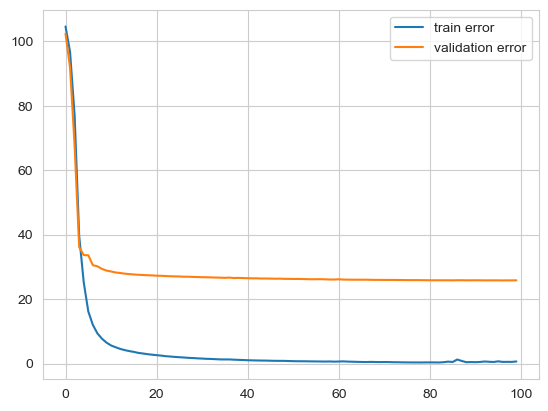

In [283]:
plt.plot(history.history['root_mean_squared_error'], label='train error')
plt.plot(history.history['val_root_mean_squared_error'], label='validation error')
plt.legend()

### define built_model function for its reuseblity

In [284]:
def built_model():
    model = Sequential()
    model.add(Dense(120,activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=RootMeanSquaredError())
    return model

In [285]:
model = built_model()
logdir = 'logs/fit/0_initial_model'
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
history = model.fit(X_train_scaled,y_train, 
                    epochs=100, 
                    batch_size=32,
                    validation_split=0.2, 
                    verbose=0,
                    callbacks=[tensorboard_callback])


### Early Stoppong Model 1

In [286]:
early_stopping = EarlyStopping(monitor='root_mean_squared_error',
                              patience=20,
                              min_delta=0.5,
                              mode='min')

In [287]:
model = built_model()
logdir = 'logs/fit/1_ES_model'
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
history = model.fit(X_train_scaled,y_train, 
                    epochs=100, 
                    batch_size=32,
                    validation_split=0.2, 
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

### Create JSON File to Store Model Metrics 

In [288]:
# std_dev_y_train = np.std(y_train)

# models_metrics = {'SD y_train':std_dev_y_train}

# with open('models_metrics.json','w') as f:
#     json.dump(models_metrics,f)
    

### Model Evaluation and Plotting

In [289]:
def calculate_rmse(prediction,targets):
    return np.sqrt(np.mean((prediction - targets) ** 2))

In [290]:
def evaluate_and_plot_model(model_name, model, history):
    last_train_rmse = history.history['root_mean_squared_error'][-1]
    last_val_rmse = history.history['val_root_mean_squared_error'][-1]
    
    test_predictions = model.predict(X_test_scaled).reshape(-1)
    test_rmse = calculate_rmse(test_predictions,y_test)
    
    with open('models_metrics.json','r') as f:
        models_metrics = json.load(f)
        
    
    models_metrics[f'{model_name} trained'] = last_train_rmse
    models_metrics[f'{model_name} validated'] = last_val_rmse
    models_metrics[f'{model_name} test'] = test_rmse
    
    with open('models_metrics.json','w') as f:
        json.dump(models_metrics,f)
        
        
    plt.figure(figsize=(16,6))
    plt.bar(models_metrics.keys(),models_metrics.values())
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
       

5/5 [==============================] - 0s 590us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


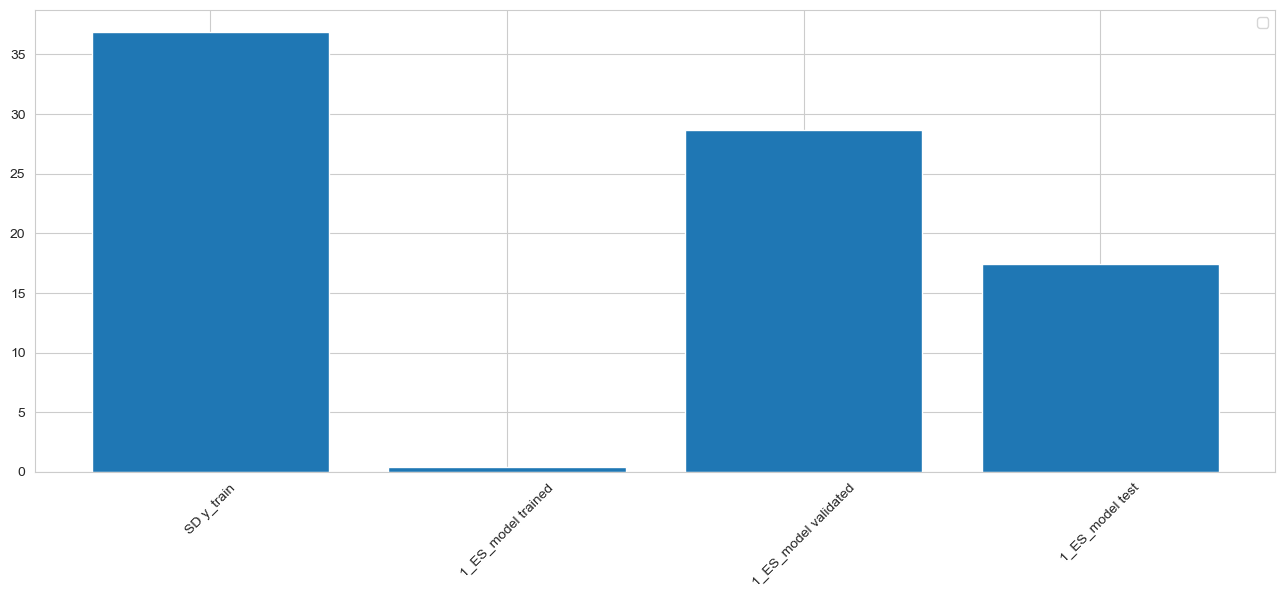

In [291]:
evaluate_and_plot_model('1_ES_model',model,history)

#### Analysis: 
While the training set of the Early Stopping Model has really low Root Squared Mean Error (RMSE), the validation set has signifiantly higher RMSE compared to the training set, illustrating the initial model has over fitting problem (Model is performing too well on the training set). It is interesting to note that, the test RSME is lower than that of validation, this might also due to the fact that the model is less generalized. While the training set of the initial model exhibits a remarkably low Root Mean Squared Error (RMSE), the validation set shows a significantly higher RMSE in comparison to the training set. This discrepancy suggests that the initial model may be experiencing overfitting, performing exceptionally well on the training set but struggling to generalize to unseen data. It's worth noting that the test RMSE is lower than that of the validation set, which could further indicate a lack of generalization in the model. Next, to address the over fitting issue, I applied k-fold cross validation method. 

In [292]:
logdir = 'logs/fit/1_ES_model'

### K-fold Cross Validation Model 

In [293]:
kf = KFold(n_splits=5)

model = built_model()

for i, (train,test) in enumerate(kf.split(X_train_scaled,y_train)):
    logdir = f'logs/fit/1_ES_CV5_{i}_model'
    tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
    
    history = model.fit(X_train_scaled[train],y_train[train], 
                    epochs=100, 
                    batch_size=32,
                    # validation_split=0.2, 
                    validation_data=(X_train_scaled[test],y_train[test]),
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

### Model Evaluation and Plotting

5/5 [==============================] - 0s 527us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


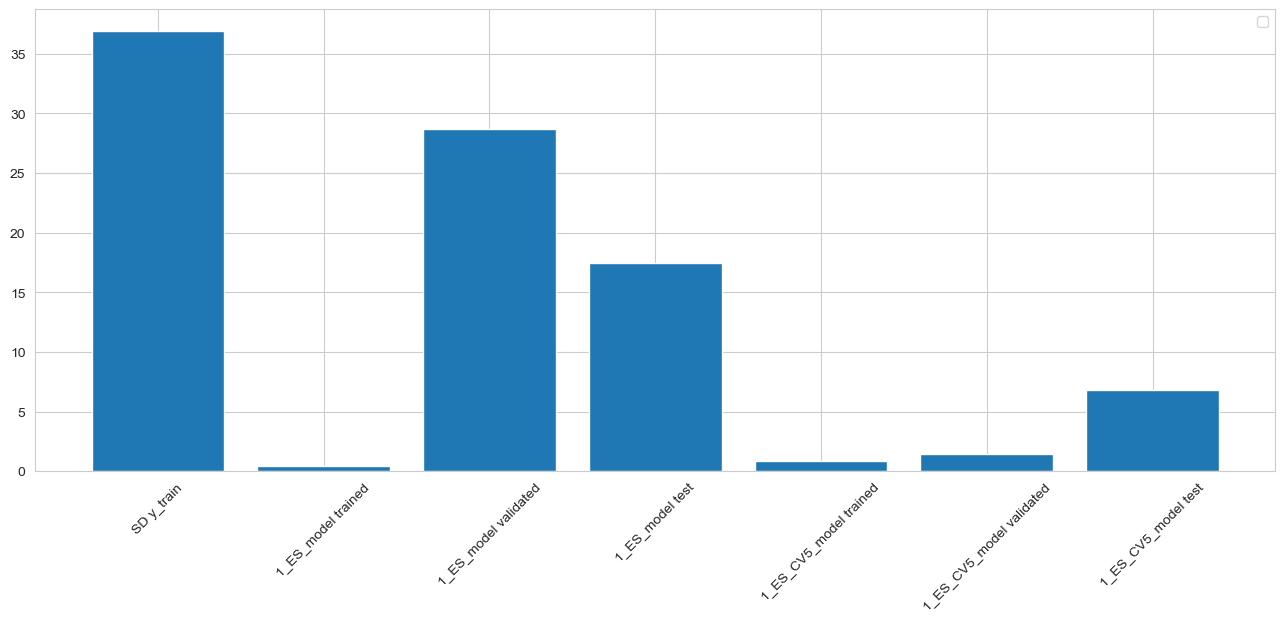

In [294]:
evaluate_and_plot_model('1_ES_CV5_model',model,history)

####  Analysis: 
The K-Fold Cross-Validation model has mitigated overfitting by significantly decreasing the RMSE for both the validation and test sets. In this iteration, the model demonstrates reduced overfitting compared to the previous version, highlighting that performing k-fold validation has enhanced the model's generalization. However, the test RMSE remains noticeably higher than that of the training and validation sets. To further optimize the model, I simplified it by reducing the number of layers.

### Simplify the Model by Reducing the Layers

In [295]:
def build_model():
    model = Sequential()
    model.add(Dense(60,activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=RootMeanSquaredError())
    return model

In [296]:
kf = KFold(n_splits=5)

model = build_model()

for i, (train,test) in enumerate(kf.split(X_train_scaled,y_train)):
    logdir = f'logs/fit/2_ES_CV5_{i}_model'
    tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
    
    history = model.fit(X_train_scaled[train],y_train[train], 
                    epochs=100, 
                    batch_size=32,
                    # validation_split=0.2, 
                    validation_data=(X_train_scaled[test],y_train[test]),
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

### Model Evaluation and Plotting

5/5 [==============================] - 0s 517us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


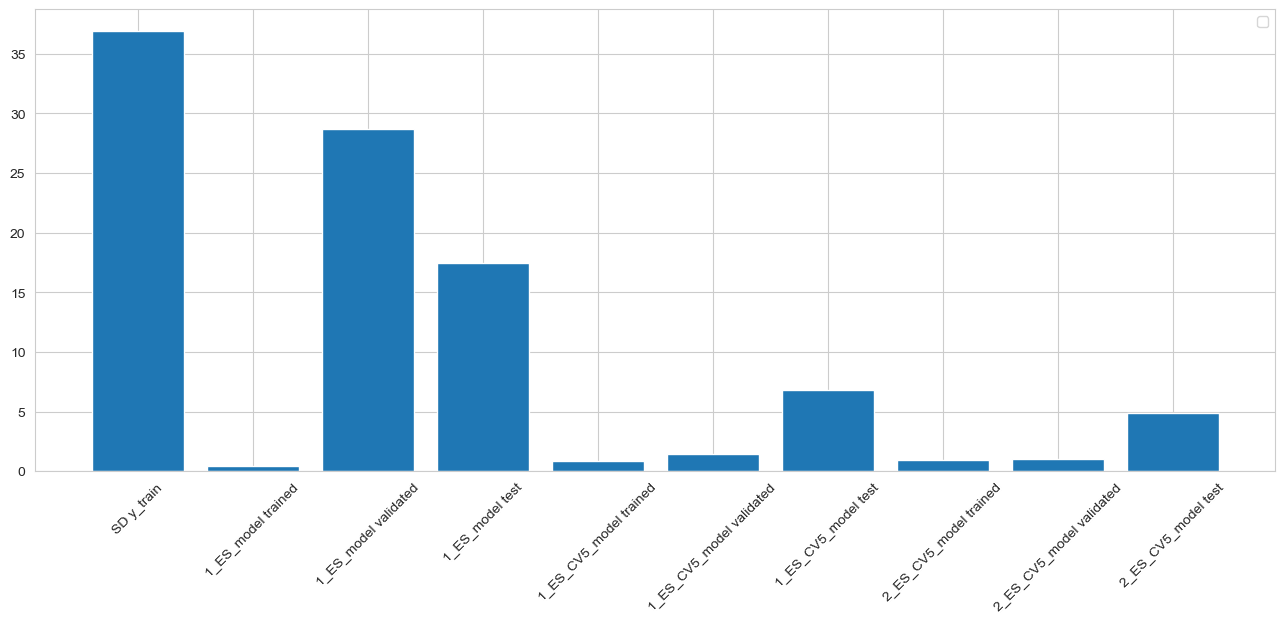

In [297]:
evaluate_and_plot_model('2_ES_CV5_model',model,history)

#### Analysis: 
After simplifying the model by reducing layers, it became more generalized than the previous versions. Both the training and validation RMSE are nearly the same, with a slight reduction in the test RMSE. Next, to explore further optimization, I decreased the number of neurons in the model.

### Further Simplify the Model by Reducing the Neurons

In [298]:
def build_model():
    model = Sequential()
    model.add(Dense(50,activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=RootMeanSquaredError())
    return model

In [299]:
kf = KFold(n_splits=5)

model = build_model()

for i, (train,test) in enumerate(kf.split(X_train_scaled,y_train)):
    logdir = f'logs/fit/3_ES_CV5_{i}_model'
    tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
    
    history = model.fit(X_train_scaled[train],y_train[train], 
                    epochs=100, 
                    batch_size=32,
                    # validation_split=0.2, 
                    validation_data=(X_train_scaled[test],y_train[test]),
                    verbose=0,
                    callbacks=[tensorboard_callback,early_stopping])

### Model Evaluation and Plotting

5/5 [==============================] - 0s 520us/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


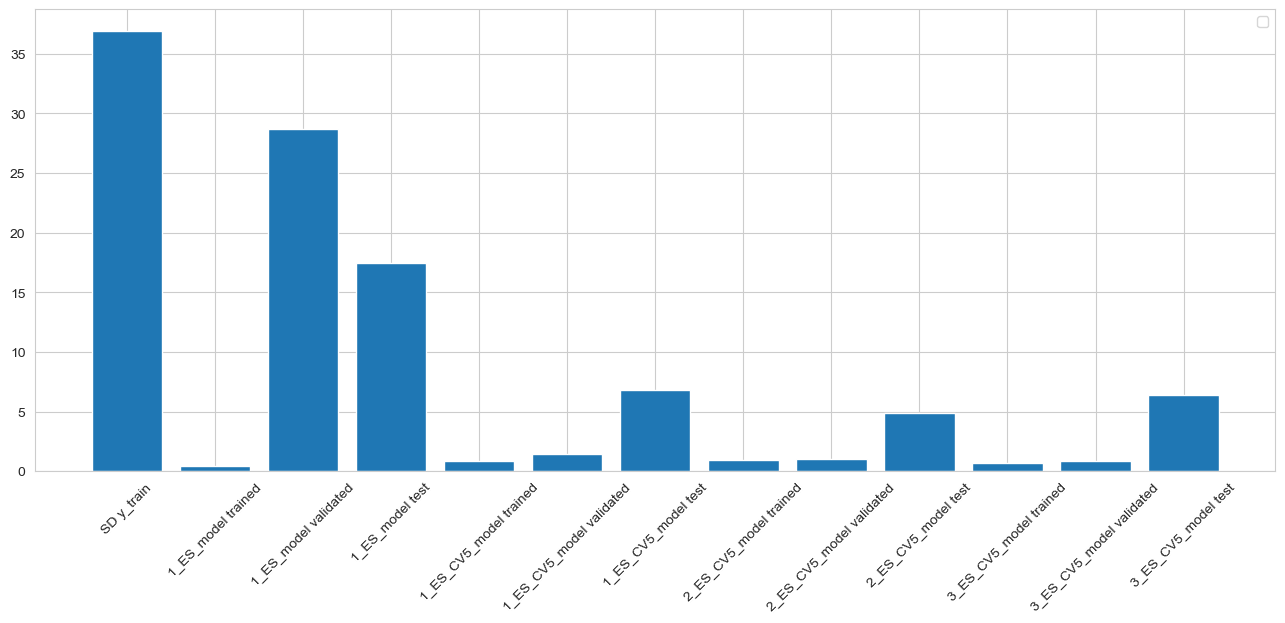

In [300]:
evaluate_and_plot_model('3_ES_CV5_model',model,history)

#### Analysis: 
While the training and validation RMSE slightly decreased by a similar degree in this model, the test RMSE increased, making it significantly higher than both the training and validation RMSE. This indicates that further simplifying the model did not lead to improved accuracy.   

#### Conclusion: 

Based on the above analysis, the model with reduced layers (2_ES_CV5_model) stands out as the best among all the models I developed, exhibiting fewer overfitting problems. To further optimize the model, I will explore additional methods to reduce overfitting, such as feature selection and feature engineering. 